### Estimate Correlation and others metrics between Bitcoin and ETF's

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf # Yahoo Finance API

# Function to fetch historical price data from Yahoo Finance
def fetch_data(tickers, start_date, end_date):
    
    # Fetch data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date)

    return data['Adj Close']


# Define the tickers for Bitcoin and ETFs
bitcoin_ticker = 'BTC-USD'
etf_tickers = 'XLK'  # Example ETF tickers


# # Define the date range
start_date = '2014-01-01'
end_date = '2024-03-25'

bitcoin_data = pd.DataFrame()
etf_data = pd.DataFrame()

# # Fetch data for Bitcoin and ETFs
bitcoin_data = fetch_data(bitcoin_ticker, start_date, end_date)
etf_data = fetch_data(etf_tickers, start_date, end_date)

fetches = pd.concat([bitcoin_data, etf_data], axis=1, join="inner")
fetches.describe()



# bitcoin_prices = bitcoin_data
# etf_prices = etf_data


# # Assuming you have fetched historical price data into pandas DataFrames
# #bitcoin_prices = pd.read_csv('bitcoin_prices.csv', index_col='Date', parse_dates=True)['Close']
# #etf_prices = pd.read_csv('etf_prices.csv', index_col='Date', parse_dates=True)

# # Calculate daily returns for Bitcoin and ETFs
# bitcoin_returns = bitcoin_prices.pct_change().dropna()
# etf_returns = etf_prices.pct_change().dropna()

# # Calculate correlation coefficients
# correlation = bitcoin_returns.corrwith(etf_returns)
# #spearman_corr = bitcoin_returns.corr(etf_returns, method='spearman')
# #kendall_tau = bitcoin_returns.corr(etf_returns, method='kendall')

# # Calculate rolling correlation
# rolling_corr = bitcoin_returns.rolling(window=30).corr(etf_returns)

# # Calculate beta and alpha
# covariance_matrix = np.cov(bitcoin_returns, etf_returns, ddof=0)
# beta = covariance_matrix[0, 1] / np.var(etf_returns)
# alpha = np.mean(bitcoin_returns) - beta * np.mean(etf_returns)

# # Calculate R-squared
# y = bitcoin_returns.values
# X = np.column_stack((np.ones_like(etf_returns), etf_returns.values))
# coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
# predictions = np.dot(X, coefficients)
# residuals = y - predictions
# total_variance = np.var(y)
# explained_variance = np.var(predictions)
# r_squared = 1 - (np.sum(residuals**2) / total_variance)

# # Calculate Sharpe ratio
# risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
# daily_rf_rate = ((1 + risk_free_rate) ** (1/252)) - 1  # Convert annual to daily rate
# bitcoin_excess_returns = bitcoin_returns - daily_rf_rate
# bitcoin_volatility = bitcoin_excess_returns.std()
# sharpe_ratio = bitcoin_excess_returns.mean() / bitcoin_volatility




# # Print or use the metrics as needed
# print("Correlation:\n", correlation)
# #print("\nSpearman's correlation:\n", spearman_corr)
# #print("\nKendall's tau:\n", kendall_tau)
# print("\nRolling correlation:\n", rolling_corr.tail())
# print("\nBeta:", beta)
# print("\nAlpha:", alpha)
# print("\nR-squared:", r_squared)
# print("\nSharpe Ratio:", sharpe_ratio)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Adj Close,Adj Close
count,2395.000000,2395.000000
mean,15484.323182,91.371969
std,17098.273684,48.446055
min,178.102997,32.854248
25%,992.512512,46.657545
50%,8574.501953,73.939537
75%,26340.408203,134.158424
max,73083.500000,210.672119


In [17]:
!pip install --upgrade statsmodels

In [15]:
!pip install seaborn
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 487.6 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.8 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.8 MB 4.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.8 MB 6.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/9.8 MB 7.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.8 MB 8.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.8/9.8 MB 8.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.3/9.8 MB 8.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.9/9.8 MB 8.9 MB/s eta 0:00:01
   ---------------------

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  10 of 10 completed


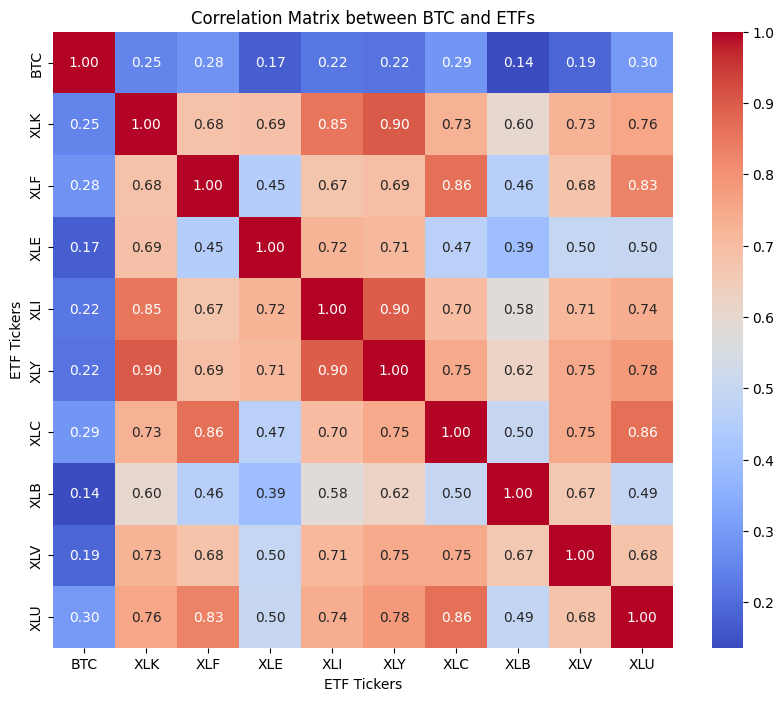

Average correlation of BTC with ETFs: 0.23
Top 3 Sectors with Highest Correlation: XLU, XLC


In [22]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_all_data(tickers, start_date, end_date):
    try:
        data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def calculate_correlation(data):
    if data is None:
        return None
    returns = data.pct_change().dropna()
    correlation_matrix = returns.corr()
    return correlation_matrix

def plot_heatmap(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix between BTC and ETFs')
    plt.xlabel('ETF Tickers')
    plt.ylabel('ETF Tickers')
    plt.show()

def plot_avg_correlation(avg_corr):
    plt.figure(figsize=(10, 6))
    plt.bar(['Average Correlation'], [avg_corr])
    plt.title('Average Correlation of BTC with ETFs')
    plt.xlabel('Metrics')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45)
    plt.show()


if __name__ == "__main__":
    start_date = '2014-01-01'
    end_date = '2024-01-01'
    btc_data = fetch_data('BTC-USD', start_date, end_date)
    
    # ETF tickers separated by domain/sector
    sector_etf_tickers = {
        'Technology': ['XLK'],
        'Financials': ['XLF'],
        'Energy': ['XLE'],
        'Industrials': ['XLI'],
        'Consumer Discretionary': ['XLY'],
        'Communication Services': ['XLC'],
        'Materials': ['XLB'],
        'Healthcare': ['XLV'],
        'Utilities': ['XLU']
    }
    
    etf_data = {}
    for sector, tickers in sector_etf_tickers.items():
        etf_data[sector] = fetch_data(tickers, start_date, end_date)
    
    all_tickers = ['BTC-USD'] + [ticker for tickers in sector_etf_tickers.values() for ticker in tickers]
    combined_data = pd.concat([fetch_all_data(all_tickers, start_date, end_date)], axis=1).ffill()
    combined_data.columns = ['BTC'] + [ticker for ticker in all_tickers[1:]]
    
    correlation_matrix = calculate_correlation(combined_data)
    if correlation_matrix is not None:
        plot_heatmap(correlation_matrix)
        avg_corr = correlation_matrix['BTC'].drop('BTC').mean()
        print("Average correlation of BTC with ETFs: {:.2f}".format(avg_corr))
        #plot_avg_correlation(avg_corr)

    top_correlated_sectors = correlation_matrix['BTC'].sort_values(ascending=False).head(3).index[1:]
    print(f"Top 3 Sectors with Highest Correlation: {', '.join(top_correlated_sectors)}")

In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

def fetch_all_data(tickers, start_date, end_date):
    """
    Fetches adjusted closing prices for a list of tickers within a date range.

    Args:
        tickers (list): List of ticker symbols.
        start_date (str): Start date in YYYY-MM-DD format.
        end_date (str): End date in YYYY-MM-DD format.

    Returns:
        pandas.DataFrame: DataFrame containing adjusted closing prices for each ticker.
    """
    try:
        data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def plot_price_series(data):
    plt.figure(figsize=(10, 6))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)
    plt.title('Adjusted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def calculate_correlation(data):
    """
    Calculates the correlation matrix between all assets in the data.

    Args:
        data (pandas.DataFrame): DataFrame containing adjusted closing prices.

    Returns:
        pandas.DataFrame: Correlation matrix between assets.
    """
    if data is None:
        return None
    returns = data.pct_change().dropna()
    correlation_matrix = returns.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.xlabel('Assets')
    plt.ylabel('Assets')
    plt.show()
    return correlation_matrix

def calculate_covariance(data):
    """
    Calculates the covariance matrix between all assets in the data.

    Args:
        data (pandas.DataFrame): DataFrame containing adjusted closing prices.

    Returns:
        pandas.DataFrame: Covariance matrix between assets.
    """
    if data is None:
        return None
    returns = data.pct_change().dropna()
    covariance_matrix = returns.cov()
    plt.figure(figsize=(10, 8))
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Covariance Matrix')
    plt.xlabel('Assets')
    plt.ylabel('Assets')
    plt.show()
    return covariance_matrix

def calculate_beta(data, benchmark):
    """
    Calculates the beta of each asset in the data relative to a benchmark.

    Args:
        data (pandas.DataFrame): DataFrame containing adjusted closing prices.
        benchmark (str): Ticker symbol of the benchmark asset.

    Returns:
        pandas.Series: Series containing beta values for each asset.
    """
    if data is None:
        return None
    returns = data.pct_change().dropna()
    benchmark_returns = returns[benchmark]
    beta_values = (returns.cov() / benchmark_returns.var())
    plt.figure(figsize=(10, 6))
    plt.bar(beta_values.index, beta_values)
    plt.title('Beta Values')
    plt.xlabel('Assets')
    plt.ylabel('Beta')
    plt.xticks(rotation=45)
    plt.show()
    return beta_values

def calculate_sharpe_ratio(data, risk_free_rate=0):
    """
    Calculates the Sharpe Ratio for each asset in the data.

    Args:
        data (pandas.DataFrame): DataFrame containing adjusted closing prices.
        risk_free_rate (float, optional): Risk-free rate (default: 0).

    Returns:
        pandas.Series: Series containing Sharpe Ratio values for each asset.
    """
    if data is None:
        return None
    returns = data.pct_change().dropna()
    excess_returns = returns - risk_free_rate / 252
    sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)
    plt.figure(figsize=(10, 6))
    plt.bar(sharpe_ratio.index, sharpe_ratio)
    plt.title('Sharpe Ratio')
    plt.xlabel('Assets')
    plt.ylabel('Sharpe Ratio')
    plt.xticks(rotation=45)
    plt.show()
    return sharpe_ratio

def check_cointegration(data):
    """
    Checks for cointegration between the assets in the data.

    Args:
        data (pandas.DataFrame): DataFrame containing adjusted closing prices.

    Returns:
        bool: True if cointegration is found, False otherwise.
    """
    if data is None:
        return None
    result = coint(data.dropna(), 1, cointegration_method='johansen')
    return result[0][0] > 0.05  # Consider assets cointegrated if p-value < 0.05

NameError: name 'data' is not defined

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint
import psycopg2

# Function to fetch data from Yahoo Finance
def fetch_data(tickers, start_date, end_date):
    try:
        data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Function to calculate metrics and analyze data
def analyze_data(data):
    if data is None:
        return None

    # Calculate correlation matrix
    correlation_matrix = data.pct_change().dropna().corr()

    # Check for cointegration
    cointegrated = check_cointegration(data)

    return correlation_matrix, cointegrated

# Function to check for cointegration
def check_cointegration(data):
    if data is None:
        return None
    result = coint(data.dropna(), 1, cointegration_method='johansen')
    return result[0][0] > 0.05  # Consider assets cointegrated if p-value < 0.05

# Function to store data in PostgreSQL database
def store_data(correlation_matrix, cointegrated):
    try:
        # Connect to PostgreSQL database
        conn = psycopg2.connect(
            host="your_host",
            database="your_database",
            user="your_username",
            password="your_password"
        )
        cursor = conn.cursor()

        # Store correlation matrix
        for col in correlation_matrix.columns:
            for idx in correlation_matrix.index:
                cursor.execute("INSERT INTO correlation_data (asset1, asset2, correlation) VALUES (%s, %s, %s)", (col, idx, correlation_matrix.loc[idx, col]))

        # Store cointegration result
        cursor.execute("INSERT INTO cointegration_data (cointegrated) VALUES (%s)", (cointegrated,))

        # Commit changes and close connection
        conn.commit()
        cursor.close()
        conn.close()

        print("Data stored successfully.")

    except (Exception, psycopg2.Error) as error:
        print("Error while connecting to PostgreSQL:", error)

if __name__ == "__main__":
    # Fetch data
    start_date = '2014-01-01'
    end_date = '2024-01-01'
    tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
    data = fetch_data(tickers, start_date, end_date)

    # Analyze data
    correlation_matrix, cointegrated = analyze_data(data)

    # Store data in PostgreSQL database
    store_data(correlation_matrix, cointegrated)


In [28]:
import tkinter as tk
from tkinter import messagebox
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Function to fetch data from Yahoo Finance
def fetch_data(tickers, start_date, end_date):
    try:
        data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
        return data
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

### Необходимо добавить в метод коинт два ряда - 1.БТС-ЮСД - 2.ЕТФ тикер
# Function to check for cointegration
def check_cointegration(data):
    if data is None:
        return None
    result = coint(data.dropna(), 1)
    return result[0][0] > 0.05  # Consider assets cointegrated if p-value < 0.05

# Function to plot time series data
def plot_time_series(data, title):
    plt.figure(figsize=(10, 6))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Function to fetch and analyze data
def analyze_data(btc_ticker, etf_tickers, start_date, end_date):
    # Fetch BTC and ETF data
    btc_data = fetch_data(btc_ticker, start_date, end_date)
    etf_data = fetch_data(etf_tickers, start_date, end_date)
    
    # Check for cointegration
    cointegrated = check_cointegration(pd.concat([btc_data, etf_data], axis=1))
    
    # Plot BTC and ETF prices
    plot_time_series(pd.concat([btc_data, etf_data], axis=1), 'BTC and ETF Prices')
    
    # Calculate and display cointegration result
    if cointegrated:
        messagebox.showinfo("Cointegration Result", "BTC and ETFs are cointegrated.")
    else:
        messagebox.showinfo("Cointegration Result", "BTC and ETFs are not cointegrated.")

# Function to handle button click event
def analyze_button_clicked():
    btc_ticker = btc_entry.get()
    etf_tickers = etf_entry.get().split(',')
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()
    
    if not btc_ticker or not etf_tickers or not start_date or not end_date:
        messagebox.showerror("Error", "Please fill in all fields.")
        return
    
    analyze_data(btc_ticker, etf_tickers, start_date, end_date)

# Create GUI window
window = tk.Tk()
window.title("BTC and ETF Analyzer")

# Create input fields
btc_label = tk.Label(window, text="BTC Ticker:")
btc_label.grid(row=0, column=0)
btc_entry = tk.Entry(window)
btc_entry.grid(row=0, column=1)

etf_label = tk.Label(window, text="ETF Tickers (comma-separated):")
etf_label.grid(row=1, column=0)
etf_entry = tk.Entry(window)
etf_entry.grid(row=1, column=1)

start_date_label = tk.Label(window, text="Start Date (YYYY-MM-DD):")
start_date_label.grid(row=2, column=0)
start_date_entry = tk.Entry(window)
start_date_entry.grid(row=2, column=1)

end_date_label = tk.Label(window, text="End Date (YYYY-MM-DD):")
end_date_label.grid(row=3, column=0)
end_date_entry = tk.Entry(window)
end_date_entry.grid(row=3, column=1)

analyze_button = tk.Button(window, text="Analyze", command=analyze_button_clicked)
analyze_button.grid(row=4, column=0, columnspan=2)

window.mainloop()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\ilyac\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1962, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ilyac\AppData\Local\Temp\ipykernel_10568\915675724.py", line 65, in analyze_button_clicked
    analyze_data(btc_ticker, etf_tickers, start_date, end_date)
  File "C:\Users\ilyac\AppData\Local\Temp\ipykernel_10568\915675724.py", line 43, in analyze_data
    cointegrated = check_cointegration(pd.concat([btc_data, etf_data], axis=1))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ilyac\AppData\Local\Temp\ipykernel_10568\915675724.py", line 22, in check_cointegration
    result = coint(data.dropna(), 1)
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ily